## Observations and Insights 

* The drug trial was set up well, there were almost as many females as males Mice. Additionally, the number mice on each trial were also same (25 each)

* Looking at the summary statistics, Capomulin has one of the best performaces with: 
        2nd lowest avg tumor volume at 40.68 mm3 (lowest was Ramicane at 40.2 mm3), 
        2nd lowest median tumor volume at 41.56 (lowest was Ramicane at 40.67 mm3),
        2nd lowest variance in tumor volume at 24.95 mm3 (lowest was Ramicane at 23.49 mm3),
        2nd lowest standard deviation in tumor volume at 4.99 mm3 (lowest was Ramicane at 4.85 mm3),
        2nd lowest SEM in tumor volume at 0.33 mm3 (lowest was Ramicane at 0.32 mm3)
        
  These results also suggest Ramicane is a strong competitor
  

* However, to get a more accurate picture, should analyze final tumor volumes. Looking the box plots, it is clear that Ramicane's final tumor volume is much higher with a larger spread as well compared to Capomulin. The box plots also indicate that Ceftamin has a closer performance to Capomulin.

* The line graph that compares tumor volume with timepoints for Capomulin, indicates that the drug might have a positive effect of tumor size and reduces the tumor volume over time (for mouse b128).

* The scatter plot along with correlation coefficient of 0.88 indicate a strong positive relationship between weight and tumor volume. i.e. higher weight is likely to correlate to higher weight and vice versa. The same is confirmed with the regression line. 


        

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)




In [2]:
#visualize Data
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [3]:
#visualize Data
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [4]:
# Checking the number of mice.
#number of records pre-duplicate deletion
len(study_results)

1893

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Optional: Get all the data for the duplicate mouse ID. 
duplicates_study = study_results[study_results.duplicated(["Mouse ID","Timepoint"])]
print(duplicates_study)


     Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites
137      g989          0           45.000000                 0
360      g989          5           47.570392                 0
681      g989         10           49.880528                 0
869      g989         15           53.442020                 0
1111     g989         20           54.657650                 1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
study_results=study_results.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')


In [7]:
# Checking the number of mice in the clean DataFrame.
len(study_results)

1888

In [8]:
# Combine the data into a single dataset
# Only need Data for Mice that were in the study
combined_df= study_results.merge(mouse_metadata,how="inner")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [9]:
#len should be same as study_results since only need data for mice that were in the study
len(combined_df)

1888

## Summary Statistics

In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

avg_volume=combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
avg_volume=pd.DataFrame(avg_volume)
avg_volume['Tumor Volume (mm3)'] = avg_volume['Tumor Volume (mm3)'].map('{:,.2f}'.format) 
avg_volume=avg_volume.rename(columns={"Tumor Volume (mm3)": "Average Tumor Volume (mm3)"})
#avg_volume

med_volume=combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
med_volume=pd.DataFrame(med_volume)
med_volume['Tumor Volume (mm3)'] = med_volume['Tumor Volume (mm3)'].map('{:,.2f}'.format) 
med_volume=med_volume.rename(columns={"Tumor Volume (mm3)": "Median Tumor Volume (mm3)"})
#med_volume

var_volume=combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
var_volume=pd.DataFrame(var_volume)
var_volume['Tumor Volume (mm3)'] = var_volume['Tumor Volume (mm3)'].map('{:,.2f}'.format) 
var_volume=var_volume.rename(columns={"Tumor Volume (mm3)": "Variance Tumor Volume (mm3)"})
var_volume

std_volume=combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
std_volume=pd.DataFrame(std_volume)
std_volume['Tumor Volume (mm3)'] = std_volume['Tumor Volume (mm3)'].map('{:,.2f}'.format) 
std_volume=std_volume.rename(columns={"Tumor Volume (mm3)": "Standard Deviation Tumor Volume (mm3)"})
#std_volume

sem_volume=combined_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()
sem_volume=pd.DataFrame(sem_volume)
sem_volume['Tumor Volume (mm3)'] = sem_volume['Tumor Volume (mm3)'].map('{:,.2f}'.format) 
sem_volume=sem_volume.rename(columns={"Tumor Volume (mm3)": "Standard Error Tumor Volume (mm3)"})
#sem_volume

#joining all the data frames into one for display
summary_df=avg_volume.join(med_volume)
summary_df=summary_df.join(var_volume)
summary_df=summary_df.join(std_volume)
summary_df=summary_df.join(sem_volume)

summary_df

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Variance Tumor Volume (mm3),Standard Deviation Tumor Volume (mm3),Standard Error Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.38,50.78,43.22,6.57,0.53
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [11]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary_df=combined_df.groupby("Drug Regimen")['Tumor Volume (mm3)'].aggregate(["mean", "median","var","std","sem"] )
summary_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

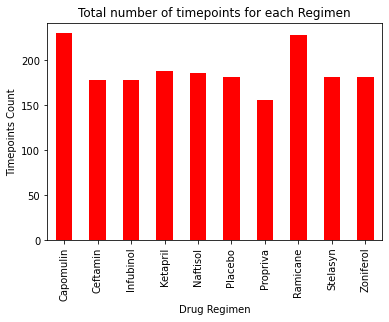

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

data_plot=combined_df.groupby("Drug Regimen")["Timepoint"].count()
data_plot.plot(kind="bar",y="Drug Regimen",color="red",title="Total number of timepoints for each Regimen",ylabel="Timepoints Count")

plt.show()

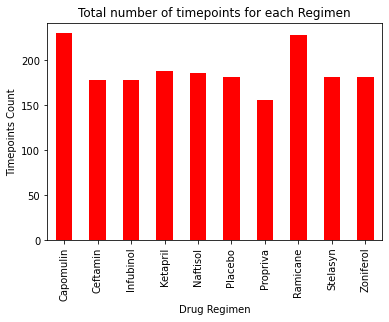

In [13]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
df_plot=pd.DataFrame(data_plot)
plt.bar(df_plot.index,df_plot["Timepoint"],color="red",width=0.5)
plt.title("Total number of timepoints for each Regimen")
plt.xticks(rotation=90) 
plt.xlabel("Drug Regimen")
plt.ylabel("Timpoint Counts")
data_plot=combined_df.groupby("Drug Regimen")["Timepoint"].count()
data_plot.plot(kind="bar",y="Drug Regimen",color="red",title="Total number of timepoints for each Regimen",ylabel="Timepoints Count")

plt.show()

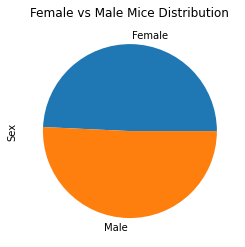

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

data_plot=combined_df.groupby("Sex")["Sex"].count()
data_plot.plot(kind="pie",y="Sex",title="Female vs Male Mice Distribution")

plt.show()


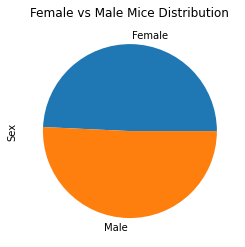

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(combined_df.groupby("Sex")["Sex"].count(),labels=["Female","Male"])
plt.title("Female vs Male Mice Distribution")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [16]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#creating a df which is grouped by Mouse ID, Drug Regimen and shows timepoint for each 
max_tp=combined_df.groupby(by=["Mouse ID","Drug Regimen"])["Timepoint"]
max_tp=pd.DataFrame(max_tp)


# Start by getting the last (greatest) timepoint for each mouse
#new column for max timepoint
max_tp["Maximum Timepoint"]="to fill"

#loop to extract max timepoint for each Mouse & Regimen combination
for row in range(len(max_tp)):
    max_tp["Maximum Timepoint"][row]=(max_tp[1][row].max())

#dropping unwanted columns
max_tp = max_tp.drop(columns=1)

#creating new df that splits mouse id and drug regimen into tow columns
max_tp2=pd.DataFrame(max_tp[0].to_list(), columns=['Mouse ID', 'Drug Regimen'],index=max_tp.index)

#merging both the df's on index to get to wanted result
max_tp = max_tp.merge(max_tp2, left_index=True,right_index=True)

#dropping/renaming appropriate columns
max_tp = max_tp.drop(columns=0)
max_tp=max_tp.rename(columns={"Mouse ID_y": "Mouse ID"})

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# merging max timepoint based on Mouse ID, Timepoint and Drug Regimen
merged_df = combined_df.merge(max_tp, how='inner', left_on=["Mouse ID", "Drug Regimen","Timepoint"], right_on=["Mouse ID", "Drug Regimen","Maximum Timepoint"])
merged_df_count=merged_df

#filtering out the four regimens needed
merged_df= merged_df.loc[(merged_df['Drug Regimen'] == "Capomulin") | (merged_df['Drug Regimen'] == "Ramicane") | (merged_df['Drug Regimen'] == "Infubinol") | (merged_df['Drug Regimen'] == "Ceftamin")]
merged_df




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),Maximum Timepoint
0,b128,45,38.982878,2,Capomulin,Female,9,22,45
29,c326,5,36.321346,0,Infubinol,Female,18,25,5
30,c139,45,72.226731,2,Infubinol,Male,11,28,45
31,v339,5,46.250112,0,Infubinol,Male,20,26,5
32,a577,30,57.031862,2,Infubinol,Female,6,25,30
...,...,...,...,...,...,...,...,...,...
244,t565,45,34.455298,0,Capomulin,Female,20,17,45
245,i557,45,47.685963,1,Capomulin,Female,1,24,45
246,m957,45,33.329098,1,Capomulin,Female,3,19,45
247,f966,20,30.485985,0,Capomulin,Male,16,17,20


In [17]:
#just to see how many mouse for each trial
merged_df_count["Drug Regimen"].value_counts()

Infubinol    25
Ramicane     25
Propriva     25
Naftisol     25
Ceftamin     25
Capomulin    25
Ketapril     25
Zoniferol    25
Placebo      25
Stelasyn     24
Name: Drug Regimen, dtype: int64

In [18]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

for regimen in treatment_list:
    # Calculate the IQR and quantitatively determine if there are any potential outliers. 
    reg_calc= merged_df.loc[(merged_df['Drug Regimen'] == regimen)]
    quartiles = reg_calc['Tumor Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    #checking if there are any outliers, using loc and OR condition to filter any data for which tumor volume is outside bounds    
    # Determine outliers using upper and lower bounds
    outliers_df= reg_calc.loc[(reg_calc['Tumor Volume (mm3)']< lower_bound) | (reg_calc['Tumor Volume (mm3)']> upper_bound)]

    #calculating &printing how many values are outliers
    print(f"The number of potential outliers are in Drug {regimen} are: {len(outliers_df)}.")



The number of potential outliers are in Drug Capomulin are: 0.
The number of potential outliers are in Drug Ramicane are: 0.
The number of potential outliers are in Drug Infubinol are: 1.
The number of potential outliers are in Drug Ceftamin are: 0.


In [19]:
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
merged_df=merged_df.groupby(by=["Drug Regimen"])
merged_df=pd.DataFrame(merged_df)
merged_df

,0,1
0,Capomulin,Mouse ID Timepoint Tumor Volume (mm3) Me...
1,Ceftamin,Mouse ID Timepoint Tumor Volume (mm3) Me...
2,Infubinol,Mouse ID Timepoint Tumor Volume (mm3) Me...
3,Ramicane,Mouse ID Timepoint Tumor Volume (mm3) Me...


Text(0, 0.5, 'Tumor Volume')

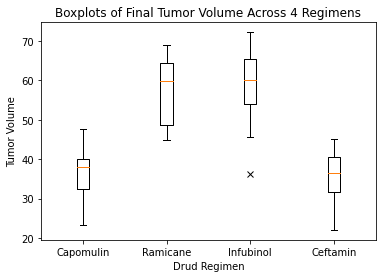

In [20]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
for regimen in range(len(merged_df)):
    plt.boxplot(merged_df[1][regimen]["Tumor Volume (mm3)"],positions = [regimen],  sym='x')
plt.title("Boxplots of Final Tumor Volume Across 4 Regimens")
plt.xticks([0,1,2,3],treatment_list)
plt.xlabel("Drud Regimen")
plt.ylabel("Tumor Volume")

'## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume')

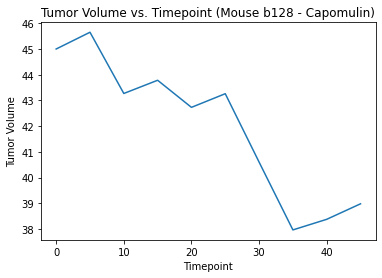

In [21]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# selected mouse ID b128

mouse_b128= combined_df.loc[(combined_df['Mouse ID'] == "b128")]
plt.plot(mouse_b128["Timepoint"],mouse_b128["Tumor Volume (mm3)"])
plt.title("Tumor Volume vs. Timepoint (Mouse b128 - Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")

Text(0.5, 0, 'Weight')

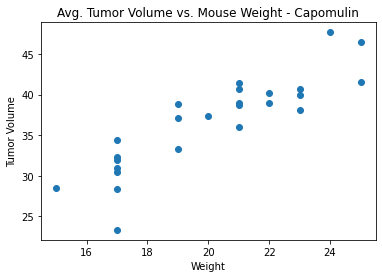

In [22]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
y_values=merged_df[1][0]["Tumor Volume (mm3)"]
x_values=merged_df[1][0]["Weight (g)"]
plt.scatter(x_values,y_values)
plt.title("Avg. Tumor Volume vs. Mouse Weight - Capomulin")
plt.ylabel("Tumor Volume")
plt.xlabel("Weight")

## Correlation and Regression

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#corr coefficient
corr= st.pearsonr(x_values,y_values)
print(f'Pearsons correlation: {round(corr[0],2)}')

Pearsons correlation: 0.88


In [24]:
#linear regression model 
from scipy import stats
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

# Get regression values
regress_values = x_values * slope + intercept
print(regress_values)

0      39.958448
225    38.207980
226    31.206107
227    31.206107
228    38.207980
229    27.705170
230    38.207980
231    41.708916
232    45.209853
233    31.206107
234    41.708916
235    38.207980
236    38.207980
237    36.457512
238    45.209853
239    31.206107
240    39.958448
241    34.707043
242    34.707043
243    41.708916
244    31.206107
245    43.459384
246    34.707043
247    31.206107
248    31.206107
Name: Weight (g), dtype: float64


In [25]:
#Reg line Equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq

'y = 1.75x + 1.45'

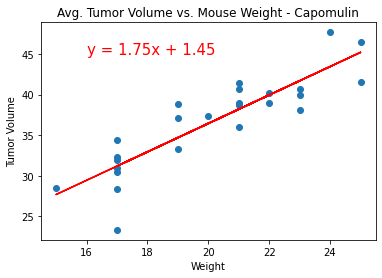

In [26]:
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,45),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')
plt.title("Avg. Tumor Volume vs. Mouse Weight - Capomulin")
plt.show()